# Big Data Mart Sales Project

**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products**

# Importing the dataset

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Bigdata training.csv')
df1=pd.read_csv('Bigdata testing.csv')

In [5]:
pd.set_option('display.max_rows',None)

# Getting a basic outlook over the data

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.shape

(8523, 12)

In [8]:
df1.shape

(5681, 11)

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Observations:
    
    1.The label encoding has to be done at the initial stage itself, because there are more catagorical columns.

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations:
    
    1.The difference between 75th percentile and max value is quite high in almost all the columns so the chances of having outliers is more.

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df['Item_Fat_Content'].nunique()

5

In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
df=df.drop(['Outlet_Identifier'],axis=1)

In [29]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
#Lets take every columna and replace the catagorical value

**Item_Fat_Content**

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
df_new=pd.DataFrame()

In [33]:
df_new['Item_Weight']=df['Item_Weight']

In [34]:
df_new['Item_Fat_Content']=df['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],[1,2,3,4,5])

In [38]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],[1,2,3,4,5])

**Item_Type**

In [44]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [45]:
df_new['Item_Type']=df['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Others','Starchy Foods','Breakfast','Seafood'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [46]:
df1['Item_Type']=df1['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Others','Starchy Foods','Breakfast','Seafood'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

**Outlet_Size**

In [47]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [54]:
df_new['Outlet_Size']=df['Outlet_Size'].replace(['Medium','Small','High'],[1,2,3])

In [49]:
df1['Outlet_Size']=df1['Outlet_Size'].replace(['Medium','Small','High'],[1,2,3])

**Outlet_Location_Type**

In [50]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [56]:
df_new['Outlet_Location_Type']=df['Outlet_Location_Type'].replace(['Tier 3','Tier 2','Tier 1'],[1,2,3])

In [61]:
df1['Outlet_Location_Type']=df1['Outlet_Location_Type'].replace(['Tier 3','Tier 2','Tier 1'],[1,2,3])

**Outlet_Type**

In [63]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [64]:
df_new['Outlet_Type']=df['Outlet_Type'].replace(['Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2'],[1,2,3,4])

In [65]:
df1['Outlet_Type']=df1['Outlet_Type'].replace(['Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2'],[1,2,3,4])

In [66]:
#Manual encoding is done

In [67]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [68]:
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,5,1.0,3,1
1,5.92,2,9,1.0,1,4
2,17.50,1,10,1.0,3,1
3,19.20,2,1,NaN,1,2
4,8.93,1,3,3.0,1,1


In [69]:
df_new['Item_Visibility']=df['Item_Visibility']

In [70]:
df_new['Item_MRP']=df['Item_MRP']

In [72]:
df_new['Outlet_Establishment_Year']=df['Outlet_Establishment_Year']

In [73]:
df_new['Item_Outlet_Sales']=df['Item_Outlet_Sales']

In [75]:
df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [76]:
df_new.head(3)

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,1,5,1.0,3,1,0.016047,249.8092,1999,3735.1380
1,5.92,2,9,1.0,1,4,0.019278,48.2692,2009,443.4228
2,17.50,1,10,1.0,3,1,0.016760,141.6180,1999,2097.2700


In [78]:
df.shape

(8523, 10)

In [79]:
df_new.shape

(8523, 10)

In [80]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,2,107.8622,OUT049,1999,1.0,3,1
1,FDW14,8.300,4,0.038428,5,87.3198,OUT017,2007,NaN,2,1
2,NCN55,14.600,1,0.099575,13,241.7538,OUT010,1998,NaN,1,2
3,FDQ58,7.315,1,0.015388,2,155.0340,OUT017,2007,NaN,2,1
4,FDY38,NaN,2,0.118599,5,234.2300,OUT027,1985,1.0,1,3


In [81]:
df1['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT035    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [82]:
df1['Outlet_Identifier']=df1['Outlet_Identifier'].replace(['OUT027','OUT013','OUT049','OUT035','OUT046','OUT045','OUT018','OUT017','OUT010','OUT019'],[1,2,3,4,5,6,7,8,9,10])

In [83]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,2,107.8622,3,1999,1.0,3,1
1,FDW14,8.300,4,0.038428,5,87.3198,8,2007,NaN,2,1
2,NCN55,14.600,1,0.099575,13,241.7538,9,1998,NaN,1,2
3,FDQ58,7.315,1,0.015388,2,155.0340,8,2007,NaN,2,1
4,FDY38,NaN,2,0.118599,5,234.2300,1,1985,1.0,1,3


In [85]:
df1=df1.drop('Item_Identifier',axis=1)

In [87]:
df1.shape

(5681, 10)

In [88]:
df.shape

(8523, 10)

In [92]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [93]:
df1.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,1,0.007565,2,107.8622,3,1999,1.0,3,1
1,8.30,4,0.038428,5,87.3198,8,2007,NaN,2,1


In [94]:
df_new.head(2)

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,1,5,1.0,3,1,0.016047,249.8092,1999,3735.1380
1,5.92,2,9,1.0,1,4,0.019278,48.2692,2009,443.4228


In [95]:
dfr=pd.read_csv('Bigdata training.csv')

In [96]:
dfr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
dfr['Outlet_Identifier'].nunique()

10

In [101]:
df['Outlet_Identifier']=dfr['Outlet_Identifier'].replace(['OUT027','OUT013','OUT049','OUT035','OUT046','OUT045','OUT018','OUT017','OUT010','OUT019'],[1,2,3,4,5,6,7,8,9,10])

In [102]:
df_new['Outlet_Identifier']=dfr['Outlet_Identifier'].replace(['OUT027','OUT013','OUT049','OUT035','OUT046','OUT045','OUT018','OUT017','OUT010','OUT019'],[1,2,3,4,5,6,7,8,9,10])

In [103]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,7
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,3
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,9
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,2


In [104]:
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Identifier
0,9.30,1,5,1.0,3,1,0.016047,249.8092,1999,3735.1380,3
1,5.92,2,9,1.0,1,4,0.019278,48.2692,2009,443.4228,7
2,17.50,1,10,1.0,3,1,0.016760,141.6180,1999,2097.2700,3
3,19.20,2,1,NaN,1,2,0.000000,182.0950,1998,732.3800,9
4,8.93,1,3,3.0,1,1,0.000000,53.8614,1987,994.7052,2


In [105]:
df.shape

(8523, 11)

In [106]:
df=df.drop('Outlet_Identifier',axis=1)

In [107]:
df['Outlet_Identifier']=dfr['Outlet_Identifier']

In [108]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,OUT049
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,OUT018
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,OUT049
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,OUT010
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,OUT013


In [109]:
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Identifier
0,9.30,1,5,1.0,3,1,0.016047,249.8092,1999,3735.1380,3
1,5.92,2,9,1.0,1,4,0.019278,48.2692,2009,443.4228,7
2,17.50,1,10,1.0,3,1,0.016760,141.6180,1999,2097.2700,3
3,19.20,2,1,NaN,1,2,0.000000,182.0950,1998,732.3800,9
4,8.93,1,3,3.0,1,1,0.000000,53.8614,1987,994.7052,2


In [110]:
df.shape

(8523, 11)

In [111]:
df_new.shape

(8523, 11)

In [112]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,2,107.8622,3,1999,1.0,3,1
1,8.300,4,0.038428,5,87.3198,8,2007,NaN,2,1
2,14.600,1,0.099575,13,241.7538,9,1998,NaN,1,2
3,7.315,1,0.015388,2,155.0340,8,2007,NaN,2,1
4,NaN,2,0.118599,5,234.2300,1,1985,1.0,1,3


In [114]:
df = df[[
'Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [115]:
df1.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,1,0.007565,2,107.8622,3,1999,1.0,3,1
1,8.30,4,0.038428,5,87.3198,8,2007,NaN,2,1


In [116]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [117]:
df_new = df_new[[
'Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [118]:
df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [119]:
df_new.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,5,249.8092,3,1999,1.0,3,1,3735.1380
1,5.92,2,0.019278,9,48.2692,7,2009,1.0,1,4,443.4228
2,17.50,1,0.016760,10,141.6180,3,1999,1.0,3,1,2097.2700


Comment:
    
    We got a precise data now, lets go for EDA

# EDA

# Univariate Analysis

Item_Weight


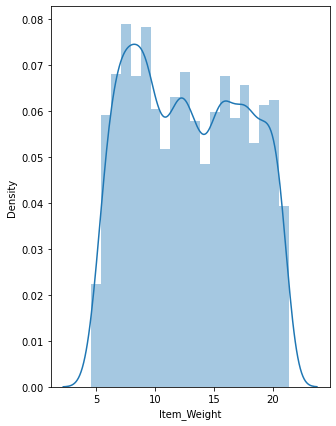



Item_Fat_Content


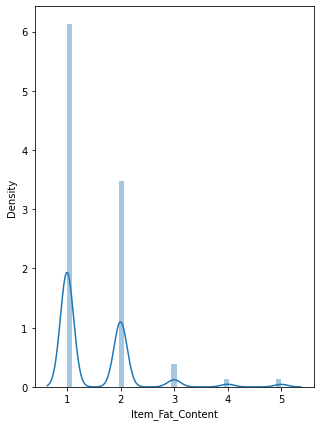



Item_Visibility


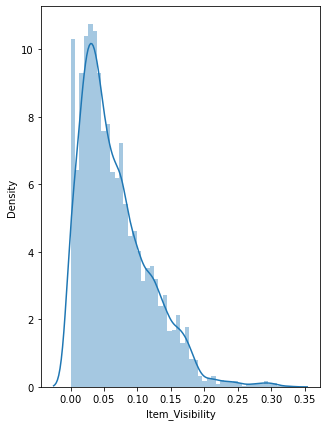



Item_Type


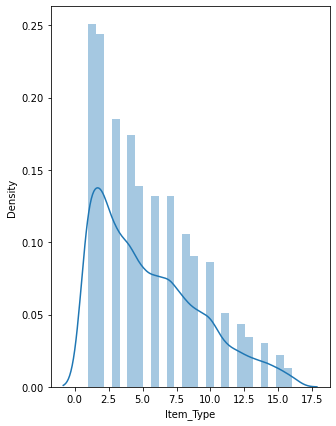



Item_MRP


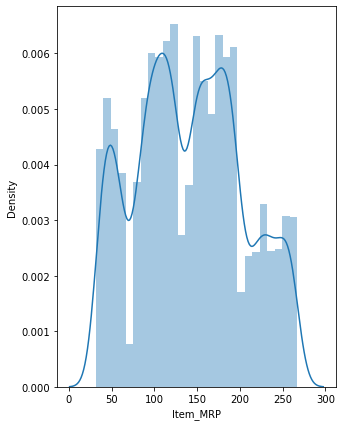



Outlet_Identifier


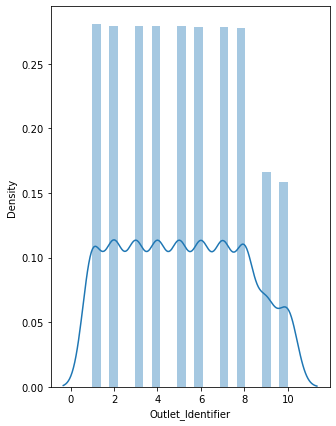



Outlet_Establishment_Year


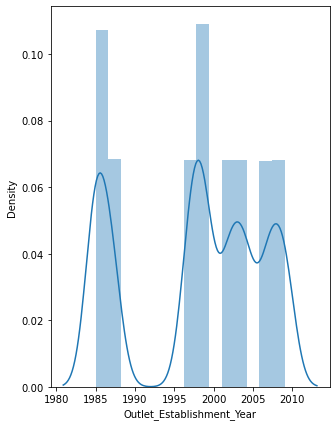



Outlet_Size


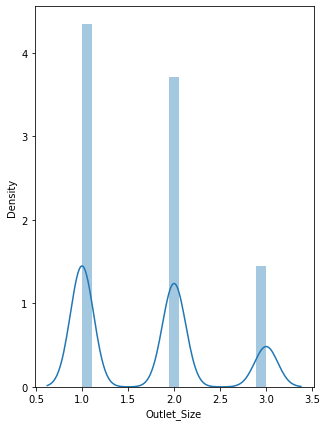



Outlet_Location_Type


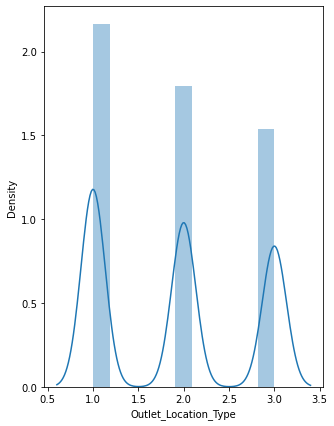



Outlet_Type


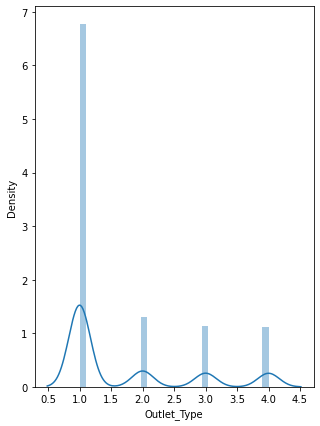



Item_Outlet_Sales


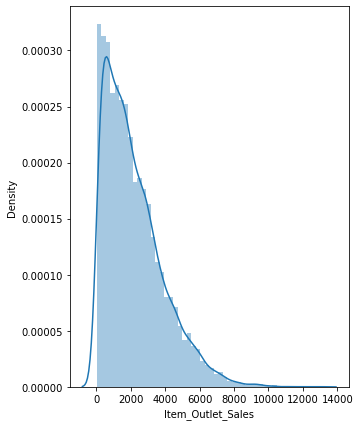

In [123]:
for col in df_new:
    print(col)
    plt.figure(figsize=(5,7))
    sns.distplot(df_new[col])
    plt.show()
    print('\n')

Observations:
    
    1.Most of the columns are catagorical columns and in numeric columns there is skewness.

Item_Weight


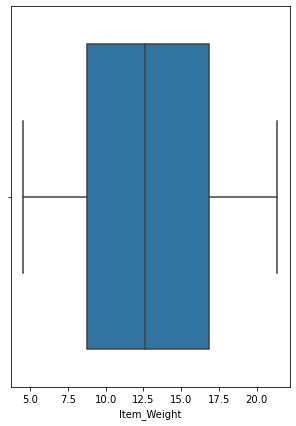



Item_Fat_Content


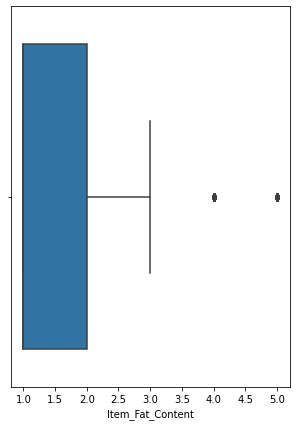



Item_Visibility


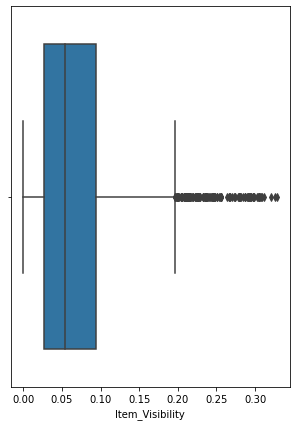



Item_Type


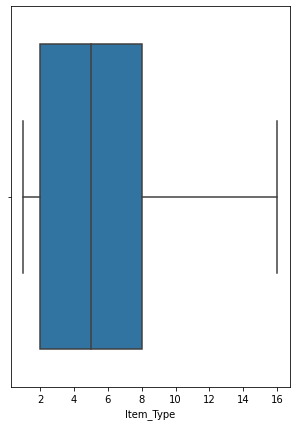



Item_MRP


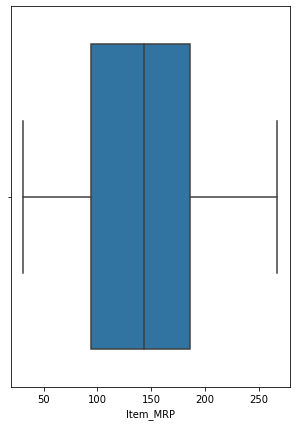



Outlet_Identifier


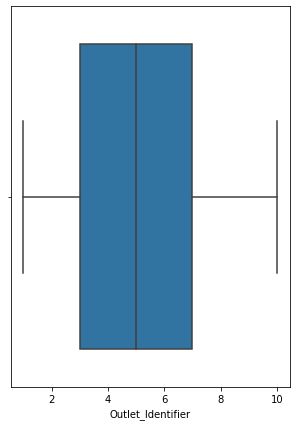



Outlet_Establishment_Year


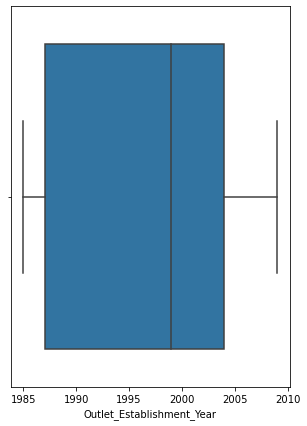



Outlet_Size


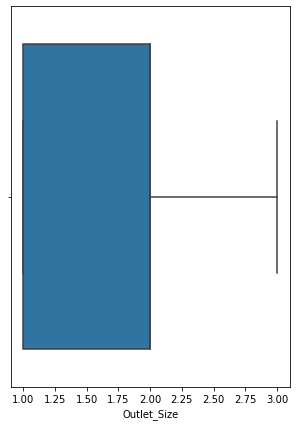



Outlet_Location_Type


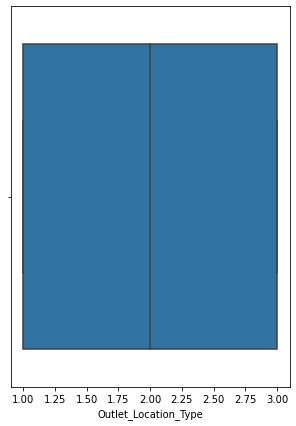



Outlet_Type


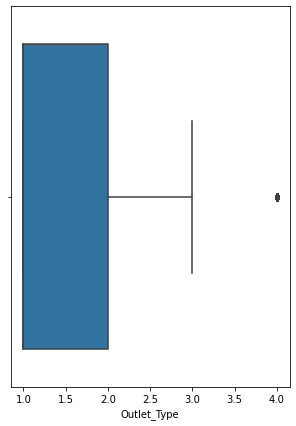



Item_Outlet_Sales


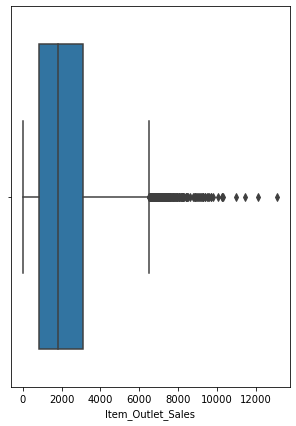

In [124]:
for col in df_new:
    print(col)
    plt.figure(figsize=(5,7))
    sns.boxplot(df_new[col])
    plt.show()
    print('\n')

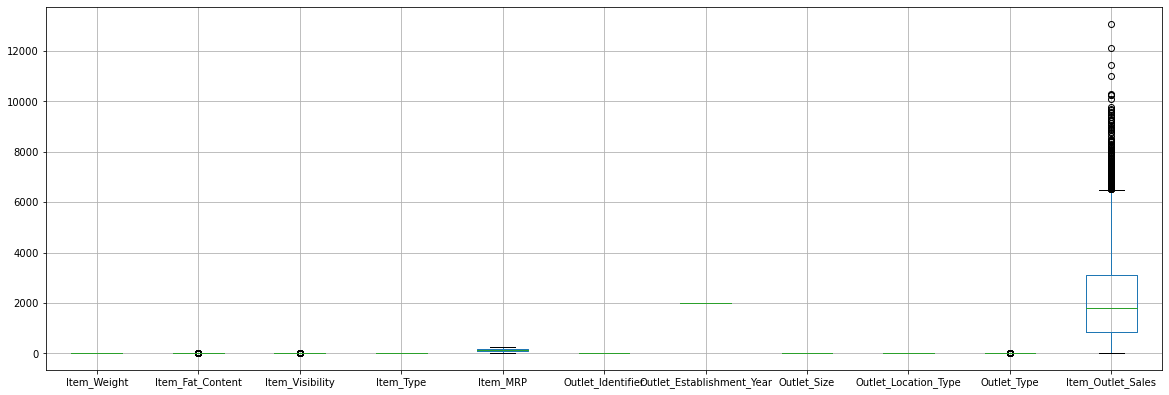

In [125]:
df_new.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Observations:
    
    1.From the above graph we can see that there are outliers in the item outlet sales.

In [128]:
df_new.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,6113.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.506864,0.066132,5.433885,140.992782,5.128711,1997.831867,1.695567,1.887129,1.673120,2181.288914
std,4.643456,0.751151,0.051598,3.754673,62.275067,2.717035,8.371760,0.718862,0.812757,1.045397,1706.499616
min,4.555000,1.000000,0.000000,1.000000,31.290000,1.000000,1985.000000,1.000000,1.000000,1.000000,33.290000
25%,8.773750,1.000000,0.026989,2.000000,93.826500,3.000000,1987.000000,1.000000,1.000000,1.000000,834.247400
50%,12.600000,1.000000,0.053931,5.000000,143.012800,5.000000,1999.000000,2.000000,2.000000,1.000000,1794.331000
75%,16.850000,2.000000,0.094585,8.000000,185.643700,7.000000,2004.000000,2.000000,3.000000,2.000000,3101.296400
max,21.350000,5.000000,0.328391,16.000000,266.888400,10.000000,2009.000000,3.000000,3.000000,4.000000,13086.964800


Observations:
    
    1.Not much significant observations.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

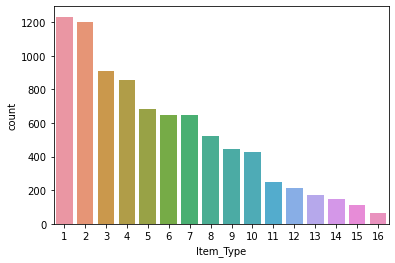

In [134]:
sns.countplot(df_new['Item_Type'])

In [135]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Observations:
    
    1.The highest sales can be seen in Fruits and Vegetables and after that Snack Food.

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10')]

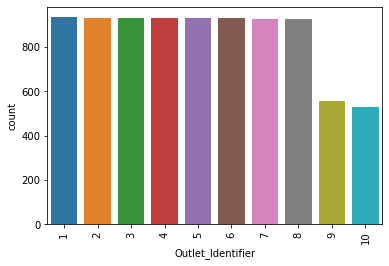

In [136]:
plt.figure()
count1=sns.countplot(df_new['Outlet_Identifier'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

In [137]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Observations:
    
    1.We can see 8 outlest have same number of values

[Text(0, 0, '1.0'), Text(1, 0, '2.0'), Text(2, 0, '3.0')]

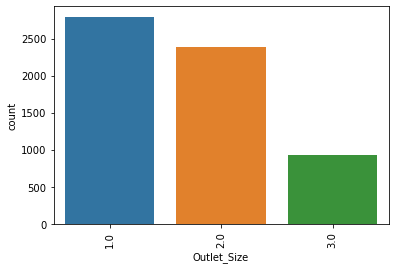

In [139]:
plt.figure()
count1=sns.countplot(df_new['Outlet_Size'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

In [138]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Observations:
    
    1.We can see that Medium sizes outlets are more in number.

# Multivariate Analysis

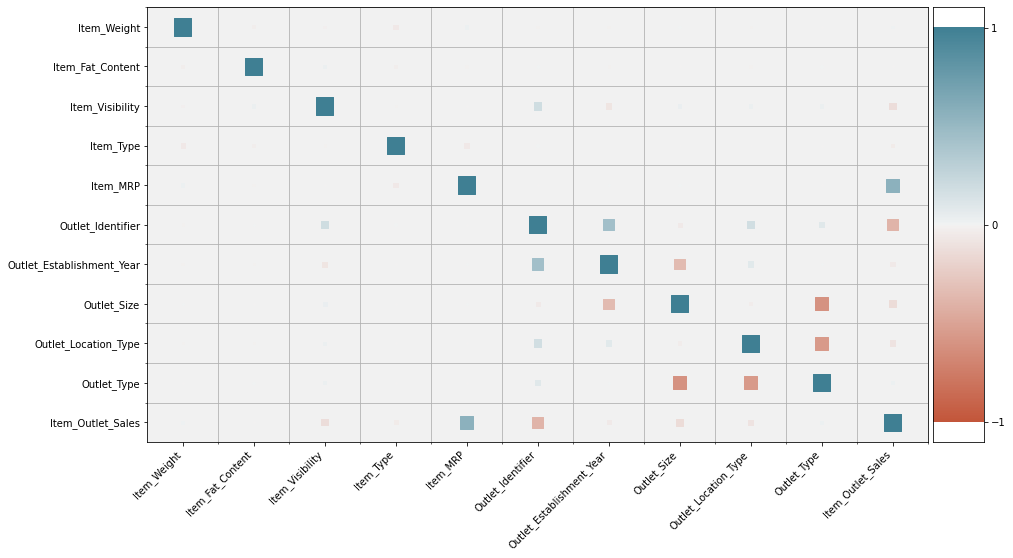

In [142]:
from heatmap import heatmap,corrplot
plt.figure(figsize=(15,8))
corrplot(df_new.corr(),size_scale=300)
plt.show()

Observations:
    
    There are some columns which contribute to target variable in significant way,
        1.Item MRP
        2.outlet identifier
        3.outlet size
        4.item visibality
        5.outlet location type

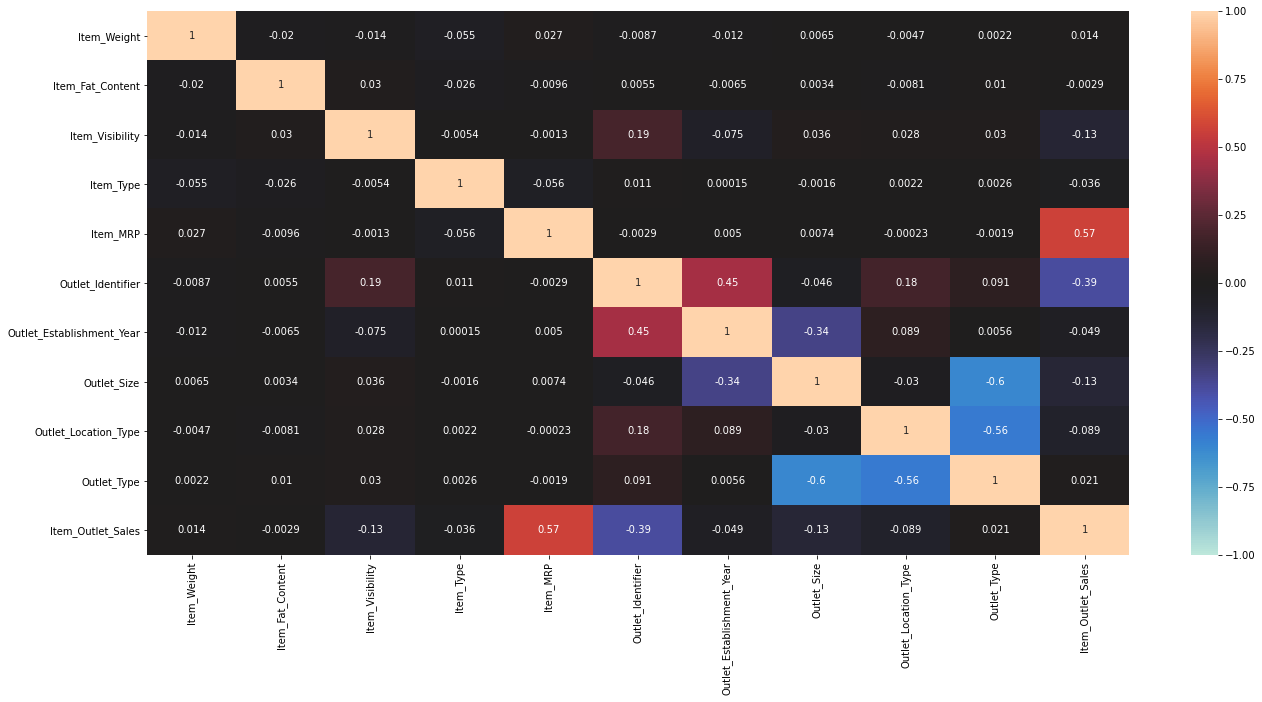

In [145]:
plt.figure(figsize=(22,10))
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

    There are some columns which have good correlation which with each other.
        1.outlet location type vs outlet type
        2.outlet size vs outlet type
        3.outlet size outlet establishment year
        4.outlet location type vs outlet identifier
        5.item visibality vs outlet identifier

**Multivariate analysis through grouping**

In [147]:
df_new['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

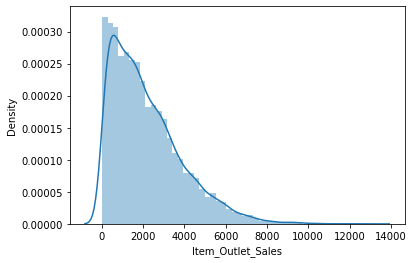

In [148]:
sns.distplot(df_new['Item_Outlet_Sales'])

Observations:
    
    1.From the above observations lets fix a bench mark above which the sales will be good and beyond which the sales will be poor.
    2.Lets consider the limit as 2400 beyond which let the sales be good .

In [149]:
good=df_new.loc[(df_new['Item_Outlet_Sales']>2400)]

In [150]:
good.shape

(3181, 11)

In [151]:
poor=df_new.loc[(df_new['Item_Outlet_Sales']<2400)]

In [152]:
poor.shape

(5342, 11)

In [153]:
df.shape

(8523, 11)

In [154]:
good.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,2546.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,2451.000000,3181.000000,3181.000000,3181.000000
mean,13.015053,1.501100,0.059792,5.294561,181.892727,4.117887,1997.338573,1.622195,1.829299,1.664257,3973.028696
std,4.617329,0.722776,0.044031,3.779579,47.415796,2.380661,8.649978,0.739595,0.785143,1.073615,1388.400042
min,4.555000,1.000000,0.000000,1.000000,52.732400,1.000000,1985.000000,1.000000,1.000000,1.000000,2402.206400
25%,9.000000,1.000000,0.025512,2.000000,149.173400,2.000000,1987.000000,1.000000,1.000000,1.000000,2916.204000
50%,12.850000,1.000000,0.049075,4.000000,180.929200,4.000000,1999.000000,1.000000,2.000000,1.000000,3572.017000
75%,17.100000,2.000000,0.087720,8.000000,221.577200,6.000000,2004.000000,2.000000,2.000000,3.000000,4655.273600
max,21.350000,5.000000,0.188620,16.000000,266.888400,8.000000,2009.000000,3.000000,3.000000,4.000000,13086.964800


In [155]:
poor.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,4514.000000,5342.000000,5342.000000,5342.000000,5342.000000,5342.000000,5342.000000,3662.000000,5342.000000,5342.000000,5342.000000
mean,12.768864,1.510296,0.069907,5.516848,116.638098,5.730625,1998.125608,1.744675,1.921565,1.678398,1114.361874
std,4.656292,0.767596,0.055277,3.737652,57.094702,2.726480,8.188323,0.700464,0.826917,1.028292,669.539790
min,4.555000,1.000000,0.000000,1.000000,31.290000,1.000000,1985.000000,1.000000,1.000000,1.000000,33.290000
25%,8.630000,1.000000,0.028850,2.000000,72.920250,3.000000,1987.000000,1.000000,1.000000,1.000000,529.311000
50%,12.500000,1.000000,0.055806,5.000000,108.609600,6.000000,1999.000000,2.000000,2.000000,1.000000,1071.272200
75%,16.750000,2.000000,0.100045,8.000000,156.057050,8.000000,2004.000000,2.000000,3.000000,2.000000,1671.990250
max,21.350000,5.000000,0.328391,16.000000,266.888400,10.000000,2009.000000,3.000000,3.000000,4.000000,2399.543200


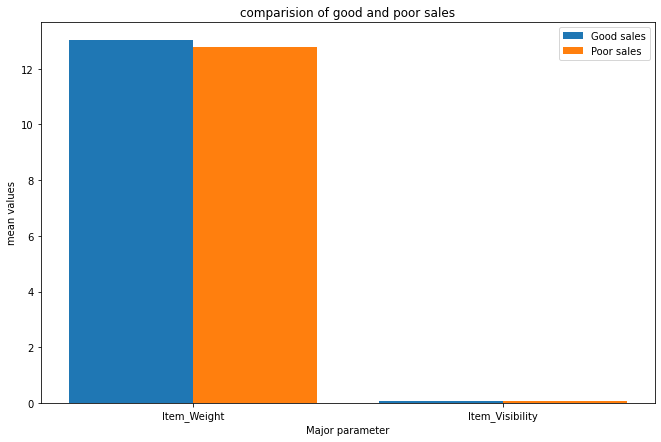

In [159]:
X =['Item_Weight','Item_Visibility']
yp = [13.015053,0.059792]
yq = [12.768864,0.069907]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4, label = 'Good sales')
plt.bar(X_axis + 0.2, yq, 0.4, label = 'Poor sales')
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean values")
plt.title("comparision of good and poor sales")
plt.legend()
plt.show()

Obsevations:
    
    1.There is not much difference

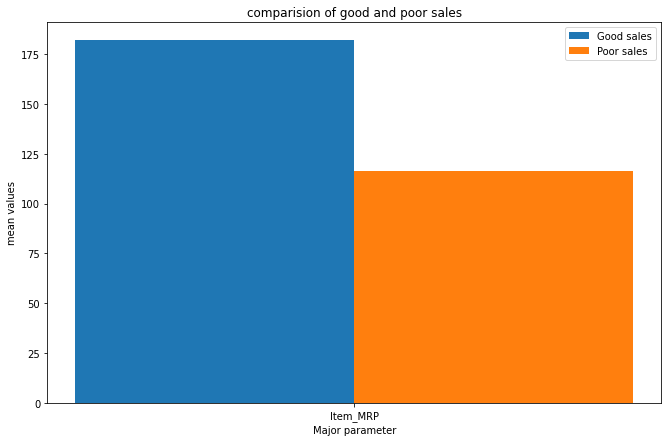

In [160]:
X =['Item_MRP']
yp = [181.892727]
yq = [116.638098]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4, label = 'Good sales')
plt.bar(X_axis + 0.2, yq, 0.4, label = 'Poor sales')
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean values")
plt.title("comparision of good and poor sales")
plt.legend()
plt.show()

Observations:
    
    1.The item outlet sales will be more when the MRP is is quite high, means arounfd 175,

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

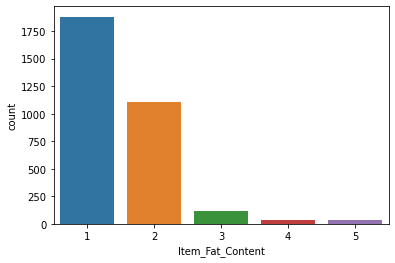

In [162]:
sns.countplot(good['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

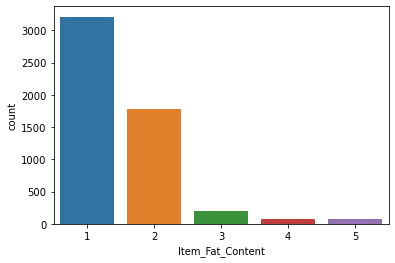

In [163]:
sns.countplot(poor['Item_Fat_Content'])

Observations:
    
    1.There is no significant observations.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

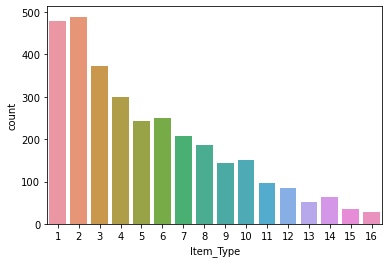

In [164]:
sns.countplot(good['Item_Type'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

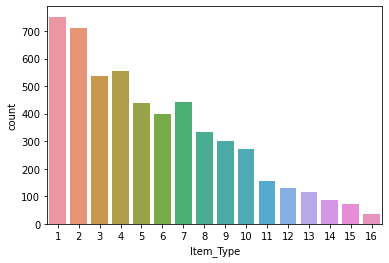

In [165]:
sns.countplot(poor['Item_Type'])

In [166]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Observations:
    
    1.For having good sales keep more snacks items and then vegetables and fruits.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

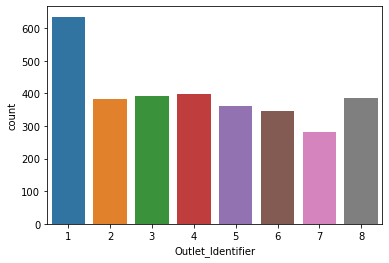

In [167]:
sns.countplot(good['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

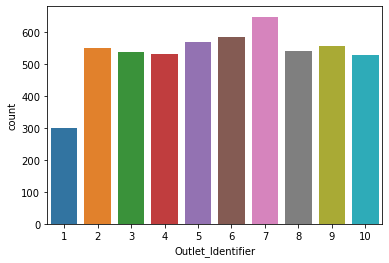

In [168]:
sns.countplot(poor['Outlet_Identifier'])

In [169]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Observations:
    
    1.There will be more good sales on OUT027

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

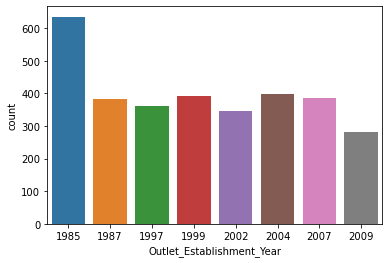

In [170]:
sns.countplot(good['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

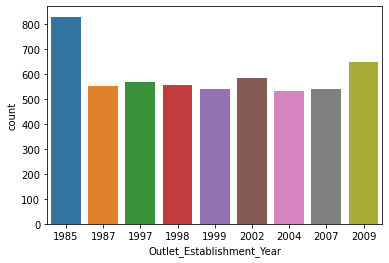

In [171]:
sns.countplot(poor['Outlet_Establishment_Year'])

Observations:
    
    1.The old companies have more good sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

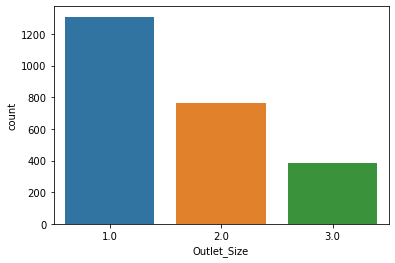

In [172]:
sns.countplot(good['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

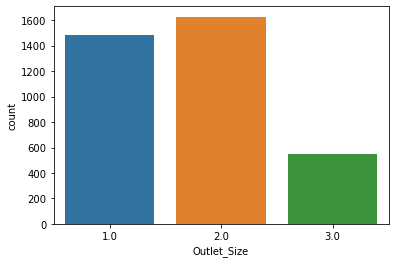

In [173]:
sns.countplot(poor['Outlet_Size'])

In [174]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Observations:
    
    1.For a good sale concentrate more on Medium outlet size.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

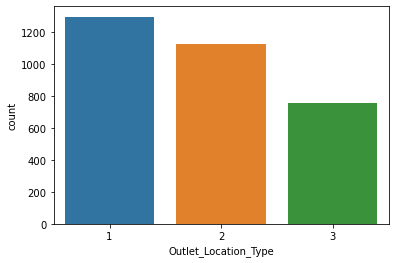

In [175]:
sns.countplot(good['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

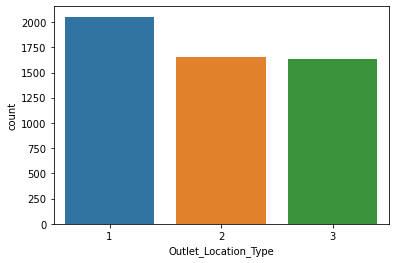

In [176]:
sns.countplot(poor['Outlet_Location_Type'])

Observations:
    
    1.There is no significant observations.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

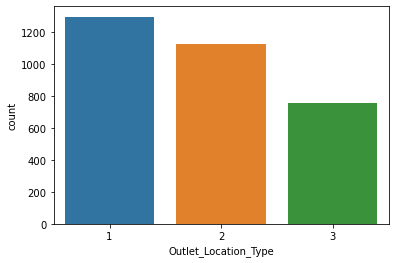

In [177]:
sns.countplot(good['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

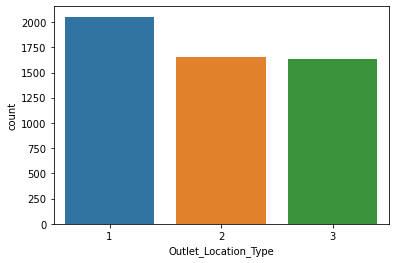

In [178]:
sns.countplot(poor['Outlet_Location_Type'])

Observations:
    
    1.No significant observations.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

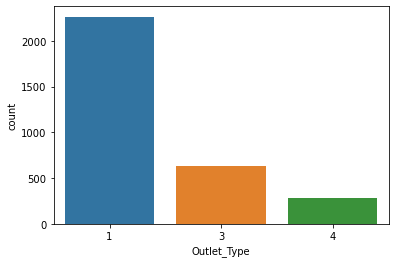

In [179]:
sns.countplot(good['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

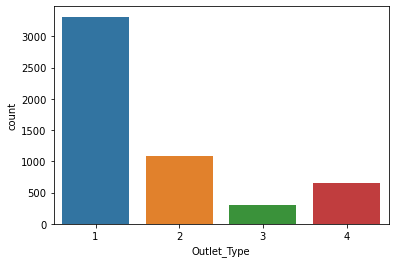

In [180]:
sns.countplot(poor['Outlet_Type'])

In [181]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Observations:
    
    1.For a good sale give more preference to Supermarket Type1 followed by Supermarket Type3 and Supermarket Type2

# Bivariate Analysis

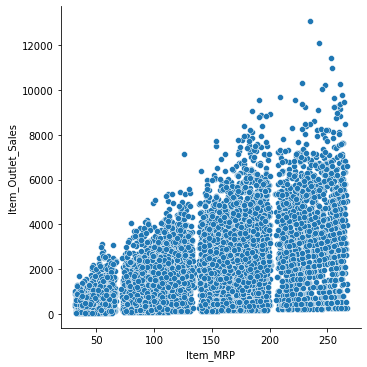

In [184]:
sns.relplot(x='Item_MRP',y='Item_Outlet_Sales',data=df_new)

Observations:
    
    1.We can see that for increased MRP there is more sales.

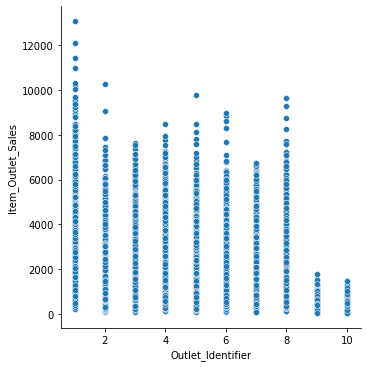

In [188]:
sns.relplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df_new)

In [186]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Observations:
    
    1.For more sales concentrate more on OUT027,OUT046,OUT045,OUT018

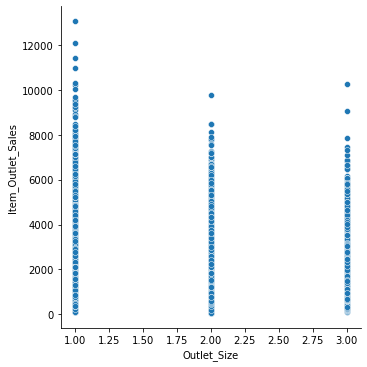

In [189]:
sns.relplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_new)

In [190]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Observations:
    
    1.For good sale concentrate on Medium sized outlets

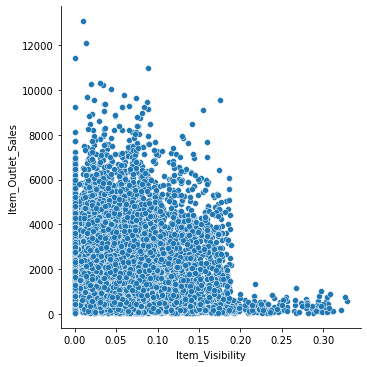

In [191]:
sns.relplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df_new)

Observations:
    
    1.For a good sale make sure that the visibality lies between 0 to 0.18

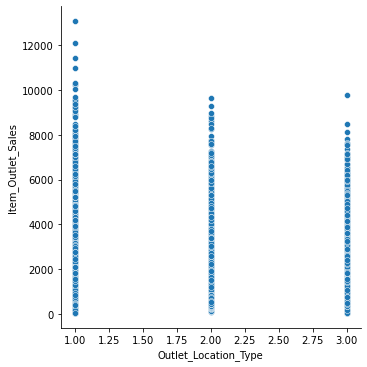

In [192]:
sns.relplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_new)

Observations:
    
    1.For more sales concentrate more on Tier 3 followed by Tier 2 and Tier 1

In [193]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

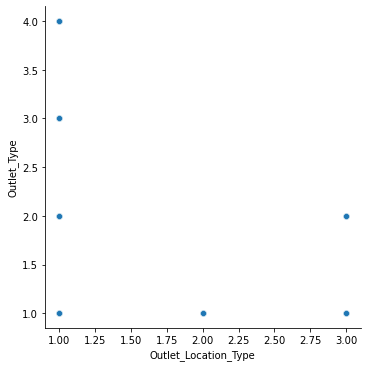

In [194]:
sns.relplot(x='Outlet_Location_Type',y='Outlet_Type',data=df_new)

observations:
    
    1.only outlet location type 1 has all 4 outlet type.

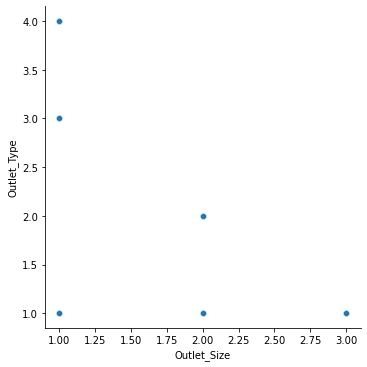

In [195]:
sns.relplot(x='Outlet_Size',y='Outlet_Type',data=df_new)

Observations:
    
    1.Outlet size 3 has only one outlet type thats one

# Data cleaning

In [196]:
df_new.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

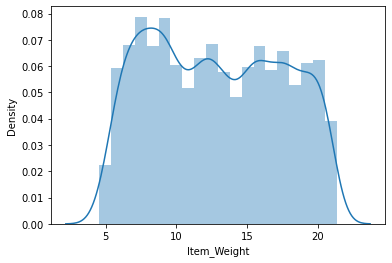

In [197]:
sns.distplot(df_new['Item_Weight'])

In [198]:
df_new['Item_Weight'].mean()

12.857645184136183

In [199]:
df_new['Item_Weight'].median()

12.6

In [202]:
df_new['Item_Weight'].fillna(12.6,inplace=True)

In [204]:
df_new.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [205]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [206]:
df_new['Outlet_Size'].fillna(1,inplace=True)

In [208]:
df_new.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [210]:
k=df_new.applymap(np.isreal)

In [211]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

Item_Weight
True    8523
Name: Item_Weight, dtype: int64


Item_Fat_Content
True    8523
Name: Item_Fat_Content, dtype: int64


Item_Visibility
True    8523
Name: Item_Visibility, dtype: int64


Item_Type
True    8523
Name: Item_Type, dtype: int64


Item_MRP
True    8523
Name: Item_MRP, dtype: int64


Outlet_Identifier
True    8523
Name: Outlet_Identifier, dtype: int64


Outlet_Establishment_Year
True    8523
Name: Outlet_Establishment_Year, dtype: int64


Outlet_Size
True    8523
Name: Outlet_Size, dtype: int64


Outlet_Location_Type
True    8523
Name: Outlet_Location_Type, dtype: int64


Outlet_Type
True    8523
Name: Outlet_Type, dtype: int64


Item_Outlet_Sales
True    8523
Name: Item_Outlet_Sales, dtype: int64




Observations:
    
    1.There is no false value.

In [212]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,2,107.8622,3,1999,1.0,3,1
1,8.300,4,0.038428,5,87.3198,8,2007,NaN,2,1
2,14.600,1,0.099575,13,241.7538,9,1998,NaN,1,2
3,7.315,1,0.015388,2,155.0340,8,2007,NaN,2,1
4,NaN,2,0.118599,5,234.2300,1,1985,1.0,1,3


In [213]:
df1.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

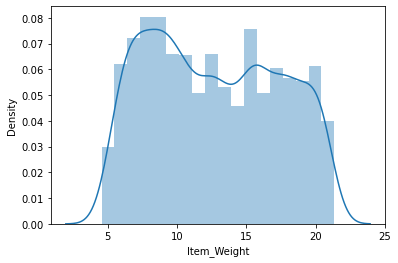

In [214]:
sns.distplot(df1['Item_Weight'])

In [215]:
df1['Item_Weight'].mean()

12.695633368756374

In [216]:
df1['Item_Weight'].median()

12.5

In [217]:
df1['Item_Weight'].fillna(12.5,inplace=True)

In [218]:
df1.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

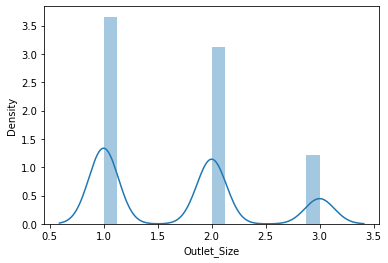

In [219]:
sns.distplot(df1['Outlet_Size'])

In [220]:
df1['Outlet_Size'].fillna(1,inplace=True)

In [221]:
df_new.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [222]:
df1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**Null values is been removed**

# Removal of the Outliers

In [223]:
from scipy.stats import zscore

In [229]:
z=np.abs(zscore(df_new))
threshold=3
df_new1=df_new[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df_new.shape[0]-df_new1.shape[0])/df_new.shape[0])

percentage of loss of data by zscore is : 0.04810512730259298


Observations:
    
    1.The data loss is les than 5%, so we can proceed further.

# Splitting the variables

In [298]:
df_new1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [299]:
x=df_new1.drop('Item_Outlet_Sales',axis=1)

In [300]:
y=df_new1['Item_Outlet_Sales']

In [301]:
x.shape

(8113, 10)

In [302]:
y.shape

(8113,)

# Skewness removal

In [309]:
x.skew()

Item_Weight                  0.115434
Item_Fat_Content             0.488410
Item_Visibility             -0.243670
Item_Type                   -0.074527
Item_MRP                     0.137117
Outlet_Identifier            0.103857
Outlet_Establishment_Year   -0.425441
Outlet_Size                  0.488866
Outlet_Location_Type         0.201396
Outlet_Type                  0.738880
dtype: float64

In [306]:
#lets find the best method for skewness
from scipy import stats
from scipy.stats import skew
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [307]:
from scipy.stats import boxcox

In [ ]:
sk=np.sqrt(x['Item_Visibility'])
sk.skew()

In [ ]:
x['Item_Visibility']=np.sqrt(x['Item_Visibility'])

In [ ]:
skee(x['Item_Type'])

In [ ]:
x['Item_Type']=stats.boxcox(x['Item_Type'])[0]

In [ ]:
skee(x['Outlet_Size'])

In [ ]:
x['Outlet_Size']=stats.boxcox(x['Outlet_Size'])[0]

In [ ]:
skee(x['Outlet_Type'])

In [ ]:
x['Outlet_Type']=stats.boxcox(x['Outlet_Type'])[0]

In [ ]:
x.skew()

In [ ]:
x['Outlet_Type']=np.cbrt(x['Outlet_Type'])

# Building the model

In [310]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=43)

In [311]:
#finding the best random state
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.5285726144056018 on random state 31


In [312]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=31)

In [313]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)


x train shape: (5679, 10)
x test shape (2434, 10)


y train shape: (5679,)
y test shape (2434,)


In [314]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.529
RMSE: 1080.788
mean absolute error: 826.287


In [315]:
#lasso model
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.529
RMSE: 1080.801
mean absolute error: 826.274


In [316]:
#Ridge model
rd=Ridge(alpha=0.1)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.529
RMSE: 1080.791
mean absolute error: 826.291


In [317]:
#ElasticNet model
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.528
RMSE: 1080.879
mean absolute error: 826.397


In [318]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : 0.165
RMSE: 1438.216
mean absolute error: 1044.163


In [319]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.586
RMSE: 1012.882
mean absolute error: 721.399


# Cross validation score

In [321]:
models=[ln,ls,rd,enr,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.495


Lasso(alpha=0.1) score is:
0.495


Ridge(alpha=0.1) score is:
0.495


ElasticNet(alpha=0.001) score is:
0.495


RandomForestRegressor(n_estimators=1000) score is:
0.546




Observations:
    
    1.From the difference of r2 score and cross val random forest regressor is the best model.

# Hyper parameter tuning

In [ ]:
rf=RandomForestRegressor()
grid_param={
    'criterion':['mse','mae'],
    
    'max_depth':[10,20,30,40,50],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_samples_split':[2,5,10,15,20],
    'bootstrap':[True,False]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best

In [325]:
rf1=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=10,max_features='auto',min_samples_split=2,bootstrap=True)

In [326]:
rf1.fit(x_train, y_train)
predrf1=rf1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf1)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf1)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf1)),3))

r2 score is : 0.612
RMSE: 980.121
mean absolute error: 699.616


In [327]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,2,107.8622,3,1999,1.0,3,1
1,8.300,4,0.038428,5,87.3198,8,2007,1.0,2,1
2,14.600,1,0.099575,13,241.7538,9,1998,1.0,1,2
3,7.315,1,0.015388,2,155.0340,8,2007,1.0,2,1
4,12.500,2,0.118599,5,234.2300,1,1985,1.0,1,3


In [328]:
df1.shape

(5681, 10)

# Predicting the data

In [329]:
Item_Outlet_Sales=rf1.predict(df1)

In [330]:
df1['Item_Outlet_Sales']=Item_Outlet_Sales

In [331]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750,1,0.007565,2,107.8622,3,1999,1.0,3,1,1490.255946
1,8.300,4,0.038428,5,87.3198,8,2007,1.0,2,1,1180.868416
2,14.600,1,0.099575,13,241.7538,9,1998,1.0,1,2,602.987357
3,7.315,1,0.015388,2,155.0340,8,2007,1.0,2,1,2170.191175
4,12.500,2,0.118599,5,234.2300,1,1985,1.0,1,3,4006.846381


In [333]:
df1.to_csv('Predicted data.csv')

# Saving the model

In [334]:
import joblib
joblib.dump(rf1,'sales.obj')

['sales.obj']